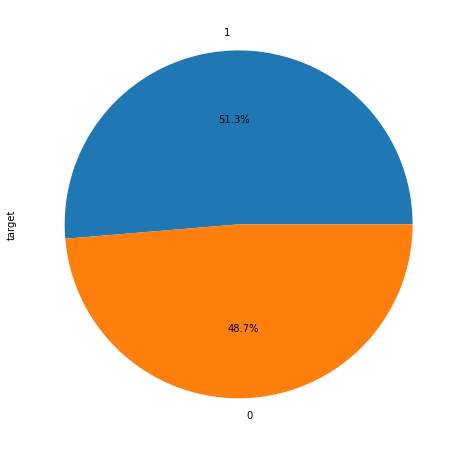

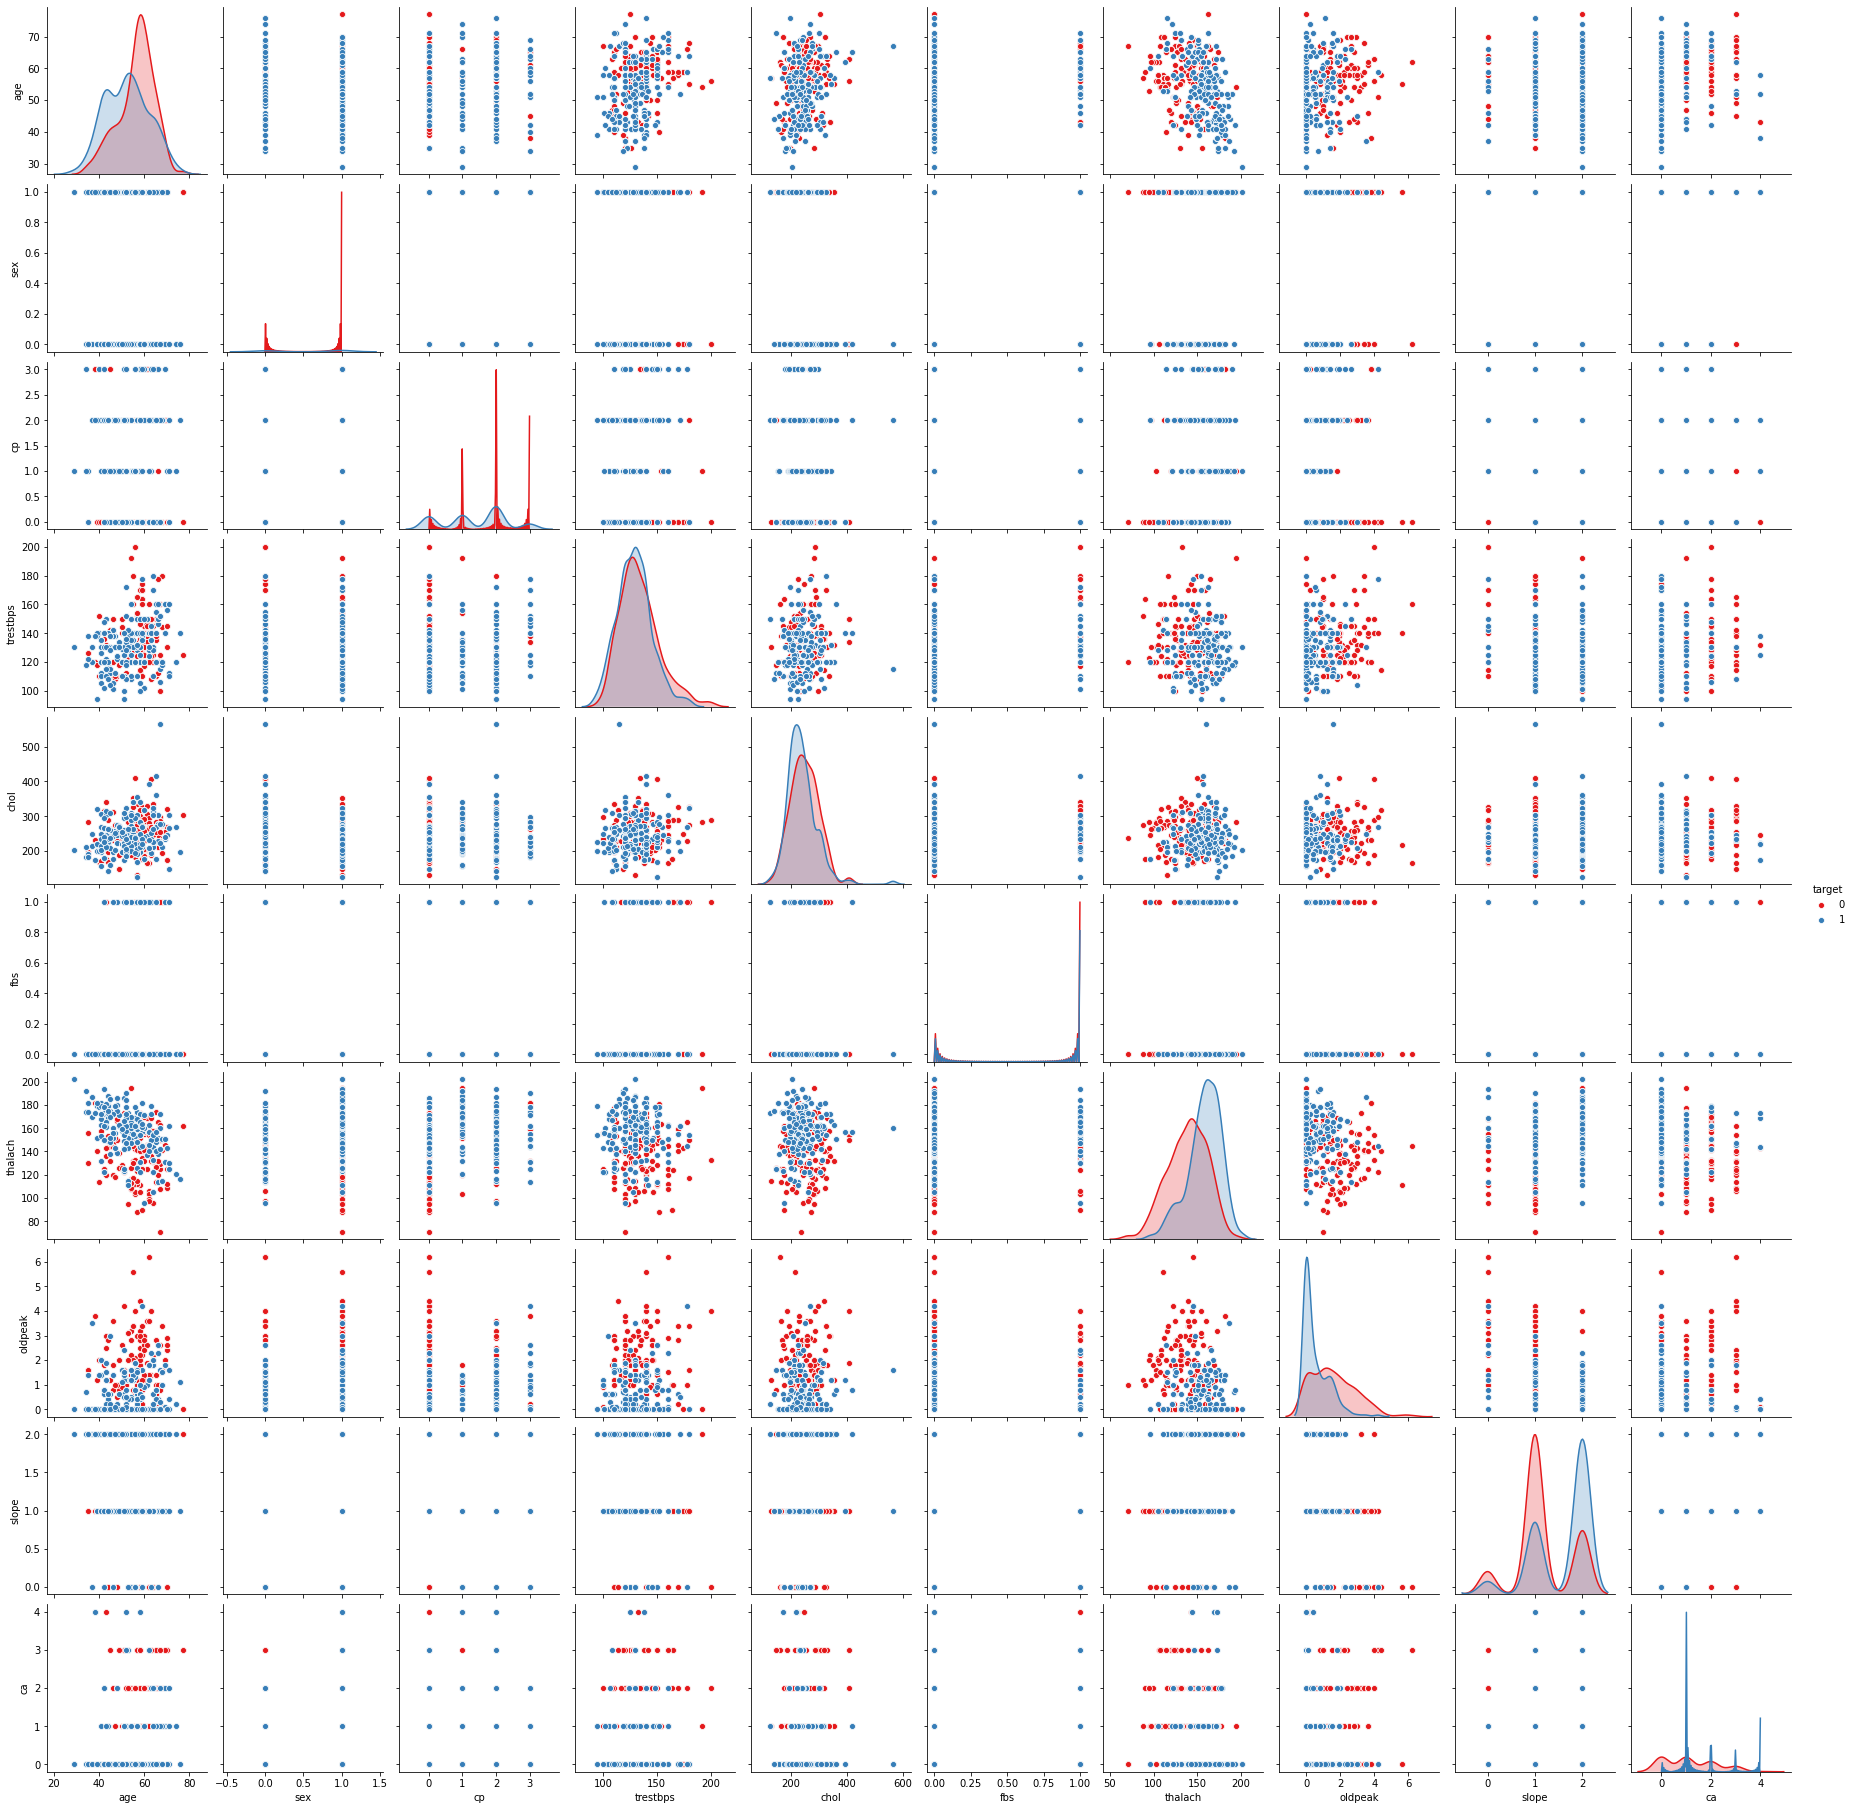

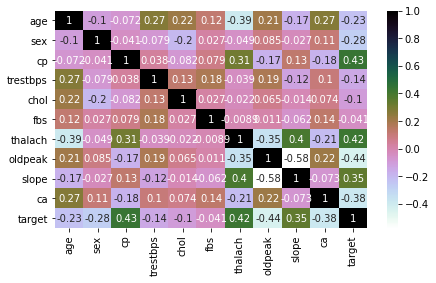

     age  sex  cp  trestbps  chol  fbs  thalach  oldpeak  slope  ca
833   55    1   0       140   217    0      111      5.6      0   0
945   56    1   3       120   193    0      162      1.9      1   0
80    50    1   2       140   233    0      163      0.6      1   1
914   66    1   0       112   212    0      132      0.1      2   1
223   39    0   2        94   199    0      179      0.0      2   0
..   ...  ...  ..       ...   ...  ...      ...      ...    ...  ..
918   59    1   3       134   204    0      162      0.8      2   2
822   60    1   0       130   253    0      144      1.4      2   1
927   42    1   2       120   240    1      194      0.8      0   0
142   61    1   3       134   234    0      145      2.6      1   2
744   60    0   2       102   318    0      160      0.0      2   1

[103 rows x 10 columns]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00       

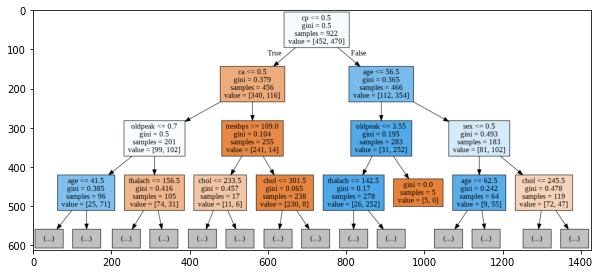

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image  
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
import pydotplus
data = pd.read_csv("/content/drive/My Drive/ICFOSS/cardio_dataset.csv")
data
data.columns
data.isnull().any()
data.dtypes
data.describe
data.shape
data.target.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8))
plt.show()
sns.pairplot(data,hue='target',palette='Set1')
plt.show()
plt.figure(figsize=(7,4))
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r')
plt.show()

x= data.drop('target',axis=1)
x
y = data['target']
y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

dtree = DecisionTreeClassifier()
f = dtree.fit(x_train,y_train)
f
predictions = dtree.predict(x_test)
predictions
print(x_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

decision_tree = tree.export_graphviz(dtree,out_file='cardio_dataset.dot',feature_names=x_train.columns,max_depth=3,filled=True)

!dot -Tpng cardio_dataset.dot -o cardio_dataset.png
image = plt.imread('cardio_dataset.png')
plt.figure(figsize=(10,10))
plt.imshow(image)
